In [2]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pprint import pprint
from scipy import linalg as la
import math
from math import pi

In [3]:
from qiskit import execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, register, get_backend
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.qi.qi import state_fidelity
from qiskit import Aer

# import state tomography functions
from qiskit.tools.visualization import plot_histogram, plot_state

WARNING Unable to complile latex. The output from the pdflatex command can be found in latex_error.log


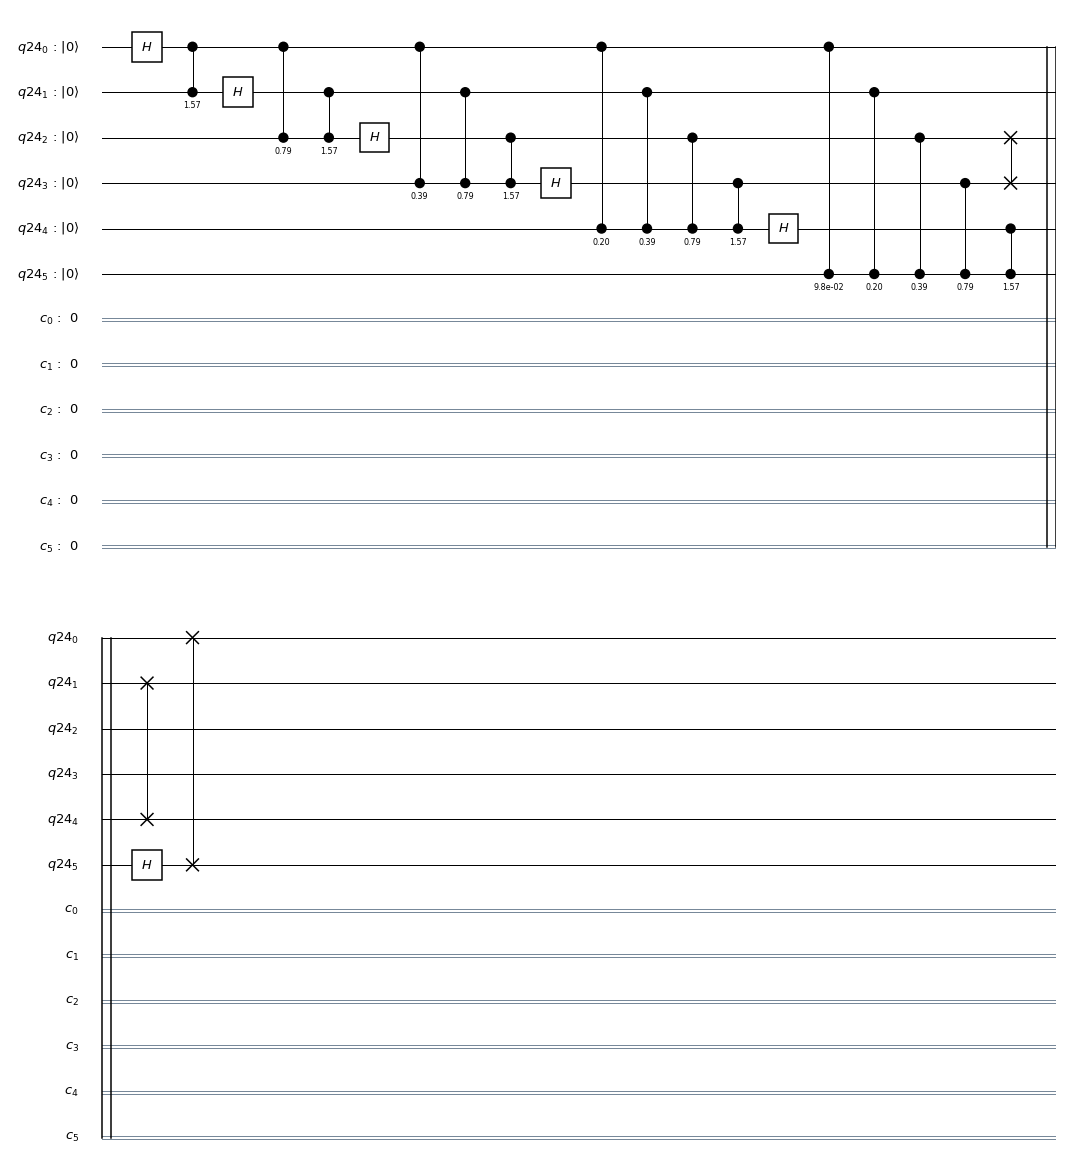

In [99]:
# Initializing a three-qubit quantum state


n = 6  # number of qubits 
q = QuantumRegister(n)
c = ClassicalRegister(n, "c")

qc = QuantumCircuit(q, c)

# qc.
qc.barrier()

for i in range(n):
    qc.h(q[i])
    for j in range(i+1, n):
#         qc.cu1((2*pi)/(2**(j+1)),q[i], q[j])
        qc.cu1((2*pi)/(2**(2+j-i-1)),q[i], q[j])
for i in range(n):
    if i <= (n/2) - 1:
        qc.swap(q[i], q[n-1-i])
qc.barrier()

circuit_drawer(qc)

In [100]:
for j in range(n):
    qc.measure(q[j], c[j])
sim_backend = Aer.get_backend('qasm_simulator')
job = execute(qc, sim_backend, shots=10240)
result = job.result()
print(result)
print(result.get_counts(qc))
print(qc.qasm())

COMPLETED
{'000000': 169, '000001': 161, '000010': 148, '000011': 178, '000100': 152, '000101': 166, '000110': 164, '000111': 174, '001000': 138, '001001': 161, '001010': 166, '001011': 150, '001100': 153, '001101': 159, '001110': 140, '001111': 171, '010000': 170, '010001': 157, '010010': 165, '010011': 132, '010100': 162, '010101': 160, '010110': 191, '010111': 165, '011000': 177, '011001': 158, '011010': 152, '011011': 172, '011100': 159, '011101': 139, '011110': 159, '011111': 169, '100000': 176, '100001': 152, '100010': 161, '100011': 150, '100100': 149, '100101': 153, '100110': 156, '100111': 169, '101000': 168, '101001': 175, '101010': 152, '101011': 149, '101100': 153, '101101': 155, '101110': 174, '101111': 172, '110000': 178, '110001': 140, '110010': 168, '110011': 167, '110100': 156, '110101': 150, '110110': 167, '110111': 161, '111000': 164, '111001': 159, '111010': 151, '111011': 145, '111100': 147, '111101': 159, '111110': 170, '111111': 157}
OPENQASM 2.0;
include "qelib1

<BarContainer object of 64 artists>

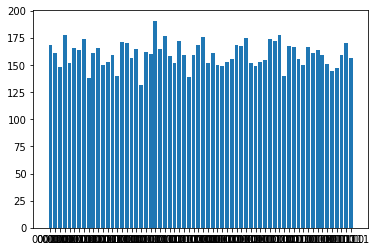

In [101]:
y = list(result.get_counts(qc).values())
x = list(result.get_counts(qc).keys())
plt.bar(x, y)

<BarContainer object of 64 artists>

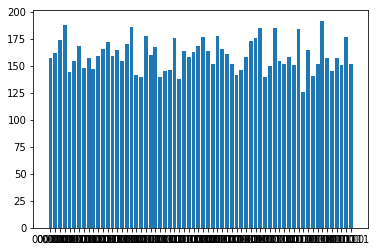

In [97]:
y = list(result.get_counts(qc).values())
x = list(result.get_counts(qc).keys())
plt.bar(x, y)